In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [74]:
df.shape

(398, 9)

In [75]:
df_1 = df.drop(['car name', 'origin'], axis = 1)

In [76]:
df_1[df_1['hp'].str.isdigit() == False]

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [77]:
df_1['hp'].replace('?', np.nan, inplace= True)
df_1[df_1['hp'].str.isdigit() == False]

,mpg,cyl,disp,hp,wt,acc,yr


In [78]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
mpg     398 non-null float64
cyl     398 non-null int64
disp    398 non-null float64
hp      392 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [83]:
df_2  = df_1.apply(lambda x: x.fillna(x.median()), axis = 0)
df_2['hp'] = df_2['hp'].astype('float64')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
mpg     398 non-null float64
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


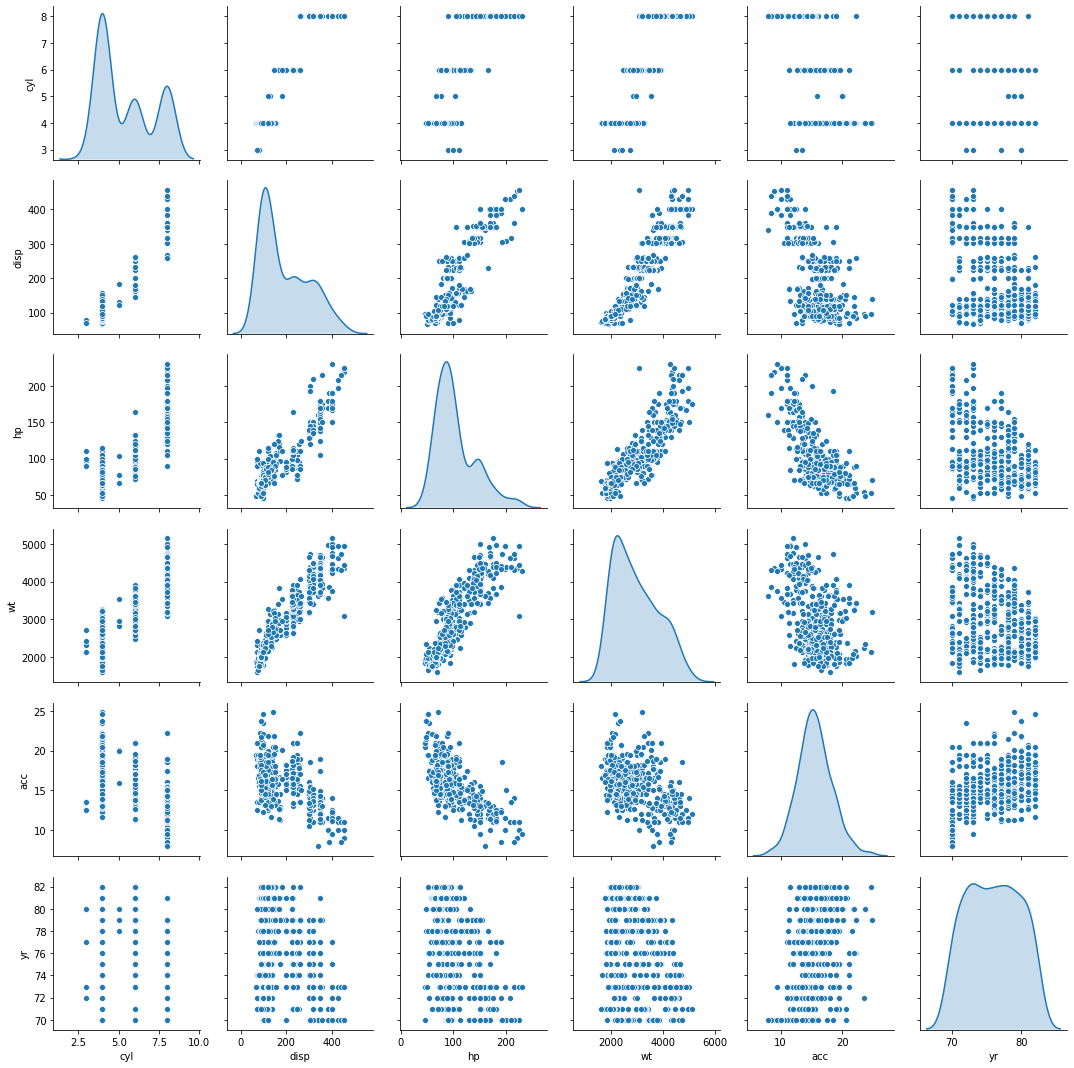

In [84]:
X = df_2.drop('mpg', axis=1)
y = df_2['mpg']

sns.pairplot(X, diag_kind = 'kde')

In [85]:
from scipy.stats import zscore

In [87]:
df_scaled = X.apply(zscore)
df_scaled.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [88]:
cov_matrix = np.cov(df_scaled, rowvar=False)
cov_matrix

array([[ 1.00251889,  0.95311615,  0.84340357,  0.89827376, -0.50669259,
        -0.34962425],
       [ 0.95311615,  1.00251889,  0.89803457,  0.93517383, -0.54505356,
        -0.37109656],
       [ 0.84340357,  0.89803457,  1.00251889,  0.86461476, -0.68831918,
        -0.41477495],
       [ 0.89827376,  0.93517383,  0.86461476,  1.00251889, -0.41850885,
        -0.30733654],
       [-0.50669259, -0.54505356, -0.68831918, -0.41850885,  1.00251889,
         0.28886274],
       [-0.34962425, -0.37109656, -0.41477495, -0.30733654,  0.28886274,
         1.00251889]])

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=6)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [91]:
pca.explained_variance_

array([4.26378678, 0.84068225, 0.67499578, 0.13552589, 0.06386533,
       0.03625731])

In [92]:
pca.explained_variance_ratio_

array([0.70884563, 0.13976166, 0.11221664, 0.0225309 , 0.01061748,
       0.0060277 ])

<BarContainer object of 6 artists>

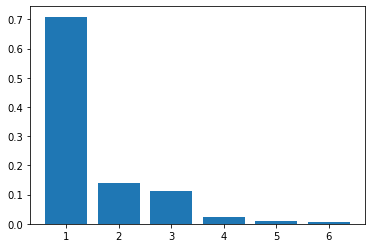

In [94]:
plt.bar(np.arange(1,7), pca.explained_variance_ratio_)

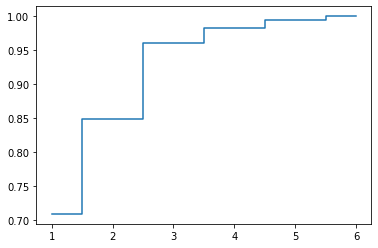

In [100]:
plt.step(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_), where='mid')

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [102]:
pca.explained_variance_ratio_

array([0.70884563, 0.13976166, 0.11221664])

In [107]:
df_pca = pca.transform(df_scaled)
df_pca

array([[ 2.58470158, -1.13503558, -0.09158558],
       [ 3.36172518, -1.03670689, -0.24694524],
       [ 2.95892839, -1.20779415, -0.47937758],
       ...,
       [-1.16393463,  0.71574676, -2.16248162],
       [-1.94324569,  1.32567228,  0.14526268],
       [-1.95553788,  1.41517409,  0.41668135]])

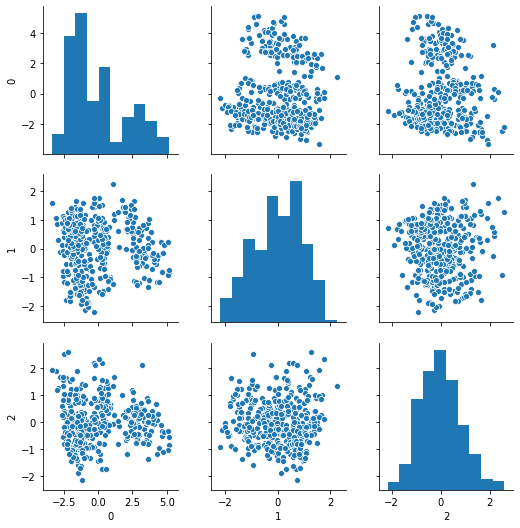

In [108]:
sns.pairplot(pd.DataFrame(df_pca))

In [109]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()
model.fit(df_scaled,y)
model.score(df_scaled,y)

0.8087079552406331

In [117]:
model.fit(df_pca, y)
model.score(df_pca, y)

0.7799909620572006